# Introduction

The dataset utilized is the Family Income and Expenditure Survey 2012 Vol 1.

# Dataset

The Family Income and Expenditure Survey (FIES) 2012 is a national survey conducted by the Philippine Statistics Authority (PSA) to gather comprehensive data on family income and spending patterns across households in the Philippines. The dataset provides insights into income distribution, expenditure habits, and economic well-being, helping policymakers, researchers, and analysts assess poverty levels, economic growth, and financial behavior among Filipino households.

# Python Libaries and Modules

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing and Cleaning

The data was preprocessed and cleaned through these methods in order:

**1.) Standardizing Column Names**
- Column names were stripped of whitespace, converted to uppercase, and spaces were replaced with underscores to ensure consistency and avoid potential errors when referencing column names in code.

**2.) Handling Missing Values**
- Columns with more than 50% missing values were dropped.
For numerical columns, missing values were filled with the median of the respective column.
For categorical columns, missing values were filled with the mode (most frequent value).
- Dropping columns with excessive missing values prevents misleading analysis.
Using the median for numerical data avoids the influence of outliers.
Using the mode for categorical data preserves the most common category.
- Asset ownership features that did not have any input were assumed to have a value of 0 (meaning they do not own that item).

**3.) Removing Duplicates**
- Duplicate rows were removed as they could distort results and introduce bias.

**4.) Converting Data Types**
- Categorical columns (e.g., region, employment status, household type) were converted to category type.
Income and expenditure columns were converted to float.
- Converting numerical columns to float ensures compatibility with mathematical operations whilst categorical columns were converted to category type for easier referencing.

**5.) Handling Outliers**
- The Interquartile Range (IQR) method was used to cap extreme values:
Values below Q1 - 1.5 * IQR were replaced with the lower bound.
Values above Q3 + 1.5 * IQR were replaced with the upper bound.
- Outliers can distort statistical analysis and machine learning models.
The IQR method retains the distribution's general shape while reducing the influence of extreme values.

In [90]:
incexp_df = pd.read_csv("FIES_2012_Cleaned.csv")
import pandas as pd
import numpy as np



# List of numeric columns
numeric_columns = ['W_SHSN', 'NATDC', 'HSE_ALTERTN', 'PSU', 'REGPC', 'T_ACTRENT',
                   'T_BIMPUTED_RENT', 'T_RENTVAL', 'BLDG_TYPE', 'RFACT', 'FSIZE', 'WALLS',
                   'BWEIGHT', 'AGRI_SAL', 'RSTR', 'NONAGRI_SAL', 'T_IMPUTED_RENT', 'AGE',
                   'T_FOOD_NEC', 'MEMBERS', 'NATPC', 'ROOF', 'FOOD_ACCOM_SRVC', 'W_HCN',
                   'POP_ADJ', 'SPOUSE_EMP', 'REGDC', 'HGC']

income_expenditure_columns = [
    "WAGES", "NETSHARE", "CASH_ABROAD", "CASH_DOMESTIC", "RENTALS_REC", "INTEREST", "PENSION", "DIVIDENDS",
    "OTHER_SOURCE", "NET_RECEIPT", "REGFT", "NET_CFG", "NET_LPR", "NET_FISH", "NET_FOR", "NET_RET", "NET_MFG",
    "NET_COM", "NET_TRANS", "NET_MIN", "NET_CONS", "NET_NEC", "EAINC", "TOINC", "LOSSES", "T_BREAD", "T_MEAT",
    "T_FISH", "T_MILK", "T_OIL", "T_FRUIT", "T_VEG", "T_SUGAR", "T_COFFEE", "T_MINERAL", "T_ALCOHOL", "T_TOBACCO",
    "T_OTHER_VEG", "T_FOOD_HOME", "T_FOOD_OUTSIDE", "T_FOOD", "T_CLOTH", "T_FURNISHING", "T_HEALTH", "T_HOUSING_WATER",
    "T_TRANSPORT", "T_COMMUNICATION", "T_RECREATION", "T_EDUCATION", "T_MISCELLANEOUS", "T_OTHER_EXPENDITURE",
    "T_OTHER_DISBURSEMENT", "T_NFOOD", "T_TOTEX", "T_TOTDIS", "T_OTHREC", "T_TOREC", "PCINC"
]

# Combine both lists
all_columns = numeric_columns + income_expenditure_columns

# Outlier handling function using IQR
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

# Apply the outlier handling function to the selected columns
for col in all_columns:
    if col in incexp_df.columns:
        incexp_df = handle_outliers(incexp_df, col)


# Exploratory Data Analysis



Sanity check if there are missing values left in the cleaned dataset file

In [91]:


missing_values = incexp_df.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])
# Get data types of each column
data_types = incexp_df.dtypes

# Display columns with missing values along with their data types
missing_data_info = pd.DataFrame({
    "Missing Values": missing_values[missing_values > 0],
    "Data Type": data_types[missing_values > 0]
})

print("Columns with Missing Values and Their Data Types:\n")
print(missing_data_info)

Missing values per column:
 Series([], dtype: int64)
Columns with Missing Values and Their Data Types:

Empty DataFrame
Columns: [Missing Values, Data Type]
Index: []


In [92]:
# Get unique values for columns with missing values
missing_columns = missing_values[missing_values > 0].index
unique_values = {col: incexp_df[col].dropna().unique() for col in missing_columns}

# Display unique values
for column, values in unique_values.items():
    print(f"Column: {column}")
    print(f"Unique Values: {values[:10]}")  # Display only first 10 unique values for readability
    print("-" * 50)

In [93]:
# Assuming df is your DataFrame
unique_values = incexp_df['CW'].unique()

# Print the unique values
print(unique_values)

[0. 3. 4. 1. 2. 7. 6. 5.]


## Display Dataset/Table Information
In order to familiarize ourselves with out dataset, we first display the info of our dataset using the `.info()` function. Here we can see the number of rows and columns and the variable type of each feature.

In [94]:
# prints the info on the dataset
incexp_df.info()

# prints the rows and columns of the dataset
print("\nRows and columns of the Dataset:")
print(incexp_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40171 entries, 0 to 40170
Columns: 119 entries, W_REGN to REGPC
dtypes: float64(102), int64(17)
memory usage: 36.5 MB

Rows and columns of the Dataset:
(40171, 119)


## Using `.head()` and `.tail()` function
We use the head and tail function to see what are the first values and the last value of the dataset. This is to give an idea on what kind of values we are working with.

In [95]:
incexp_df.head()

,W_REGN,W_OID,W_SHSN,W_HCN,URB,RSTR,PSU,BWEIGHT,RFACT,FSIZE,...,PC_QTY,OVEN_QTY,MOTOR_BANCA_QTY,MOTORCYCLE_QTY,POP_ADJ,PCINC,NATPC,NATDC,REGDC,REGPC
0,14,101001000,2.0,25.0,2,21100.0,415052.0,138.25,200.6576,3.0,...,1.0,1.0,0.0,0.0,0.946172,11.593749,9.0,8.0,8.0,9.0
1,14,101001000,3.0,43.0,2,21100.0,415052.0,138.25,200.6576,10.5,...,0.0,1.0,0.0,1.0,0.946172,10.329820,5.0,9.0,9.0,4.0
2,14,101001000,4.0,62.0,2,21100.0,415052.0,138.25,200.6576,2.0,...,0.0,1.0,0.0,0.0,0.946172,11.373589,9.0,6.0,6.0,8.0
3,14,101001000,5.0,79.0,2,21100.0,415052.0,138.25,200.6576,4.0,...,0.0,1.0,0.0,0.0,0.946172,10.676526,6.0,6.0,6.0,6.0
4,14,101001000,10.0,165.0,2,21100.0,415052.0,138.25,200.6576,5.0,...,0.0,0.0,0.0,1.0,0.946172,10.531637,6.0,6.0,6.0,5.0


In [96]:
incexp_df.tail()

,W_REGN,W_OID,W_SHSN,W_HCN,URB,RSTR,PSU,BWEIGHT,RFACT,FSIZE,...,PC_QTY,OVEN_QTY,MOTOR_BANCA_QTY,MOTORCYCLE_QTY,POP_ADJ,PCINC,NATPC,NATDC,REGDC,REGPC
40166,12,9804029001,18.0,568.0,1,22000.0,114062.0,271.25,963.2264,5.0,...,0.0,0.0,0.0,0.0,0.902863,10.312367,5.0,5.0,7.0,7.0
40167,12,9804035000,1.0,25.0,2,22000.0,414067.0,271.25,588.6253,9.0,...,0.0,1.0,0.0,0.0,0.902863,9.572890,1.0,5.0,7.0,3.0
40168,12,9804035000,2.0,51.0,2,22000.0,414067.0,271.25,588.6253,6.0,...,0.0,0.0,0.0,0.0,0.902863,9.859448,3.0,4.0,6.0,4.0
40169,12,9804035000,3.0,75.0,2,22000.0,414067.0,271.25,588.6253,5.0,...,0.0,1.0,0.0,0.0,0.902863,10.341291,5.0,6.0,7.0,7.0
40170,12,9804035000,4.0,102.0,2,22000.0,414067.0,271.25,588.6253,7.0,...,0.0,0.0,0.0,0.0,0.902863,9.663897,2.0,4.0,6.0,3.0


In [97]:
print(incexp_df.dtypes)

W_REGN                    int64
W_OID                     int64
W_SHSN                  float64
W_HCN                   float64
URB                       int64
RSTR                    float64
PSU                     float64
BWEIGHT                 float64
RFACT                   float64
FSIZE                   float64
AGRI_SAL                float64
NONAGRI_SAL             float64
WAGES                   float64
NETSHARE                float64
CASH_ABROAD             float64
CASH_DOMESTIC           float64
RENTALS_REC             float64
INTEREST                float64
PENSION                 float64
DIVIDENDS               float64
OTHER_SOURCE            float64
NET_RECEIPT             float64
REGFT                   float64
NET_CFG                 float64
NET_LPR                 float64
NET_FISH                float64
NET_FOR                 float64
NET_RET                 float64
NET_MFG                 float64
NET_COM                 float64
NET_TRANS               float64
NET_MIN 

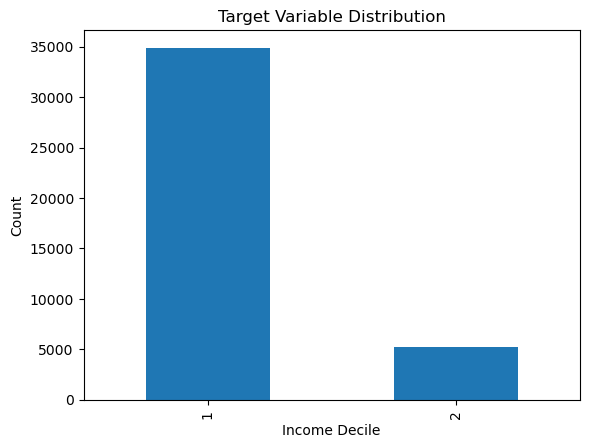

In [98]:
incexp_df['ELECTRIC'].value_counts().plot(kind='bar')
plt.title('Target Variable Distribution')
plt.xlabel('Income Decile')
plt.ylabel('Count')
plt.show()

In [99]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Checking class distribution before balancing
print("Class distribution before balancing:")
print(incexp_df['ELECTRIC'].value_counts())

# Splitting features and target variable
X = incexp_df.drop('ELECTRIC', axis=1)  # Drop the target column
y = incexp_df['ELECTRIC']               # Target column

# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Combine scaled features and target back into a single DataFrame
balanced_df = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)

# Separate majority and minority classes
majority_class = balanced_df[balanced_df['ELECTRIC'] == 1]
minority_class = balanced_df[balanced_df['ELECTRIC'] == 2]

### OPTION 1: Undersample Majority Class ###
majority_undersampled = majority_class.sample(len(minority_class), random_state=42)
balanced_df = pd.concat([majority_undersampled, minority_class])

### OPTION 2: Oversample Minority Class ###
# minority_oversampled = resample(minority_class, 
#                                 replace=True,    # Sample with replacement
#                                 n_samples=len(majority_class), # Match majority class size
#                                 random_state=42)
# balanced_df = pd.concat([majority_class, minority_oversampled])

# Shuffle the balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Update incexp_df with the balanced data
incexp_df = balanced_df

# Checking the new class distribution after balancing
print("\nClass distribution after balancing:")
print(incexp_df['ELECTRIC'].value_counts())

# Displaying a few rows of the updated DataFrame
print("\nSample of the balanced dataset:")
print(incexp_df.head())


Class distribution before balancing:
ELECTRIC
1    34886
2     5285
Name: count, dtype: int64

Class distribution after balancing:
ELECTRIC
1    5285
2    5285
Name: count, dtype: int64

Sample of the balanced dataset:
     W_REGN     W_OID    W_SHSN     W_HCN       URB      RSTR       PSU  \
0 -0.001658  1.439639  1.189398  1.922436 -1.270074  1.463552 -0.386650   
1 -0.918676 -1.180164  0.543651 -0.548448  0.787356  1.012240 -1.398083   
2 -0.168389 -0.791670 -0.102096 -0.419345  0.787356 -0.441989 -0.403210   
3 -0.085023  0.214580  1.189398 -0.236450 -1.270074  0.510782  0.493164   
4 -1.002041  0.565470 -1.393590 -0.993135  0.787356  0.611073 -0.513133   

    BWEIGHT     RFACT     FSIZE  ...  OVEN_QTY  MOTOR_BANCA_QTY  \
0  0.871048  0.235254  0.621521  ... -0.392104        -0.092333   
1 -1.137228 -1.143164 -1.730982  ... -0.392104        -0.092333   
2 -0.409227 -0.622976  0.386270  ... -0.392104        -0.092333   
3 -0.671391 -0.555542  2.738773  ... -0.392104        -0.09233

## Income Distribution
Using graphs, we display the income distribution of the dataset. This serves as a guide to see what is the trends with the values of the dataset as this could serve as a guide to what kind of machine learning algorithm we want to test using this dataset. [link text](https://)

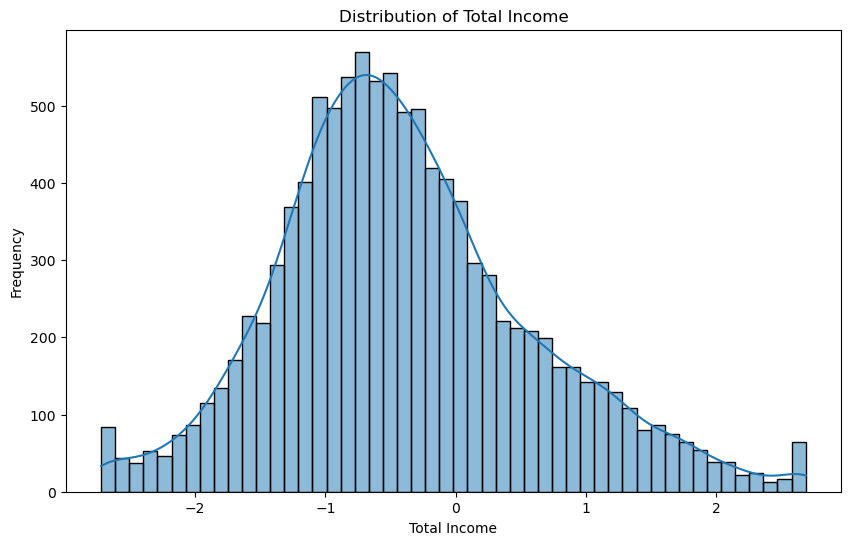

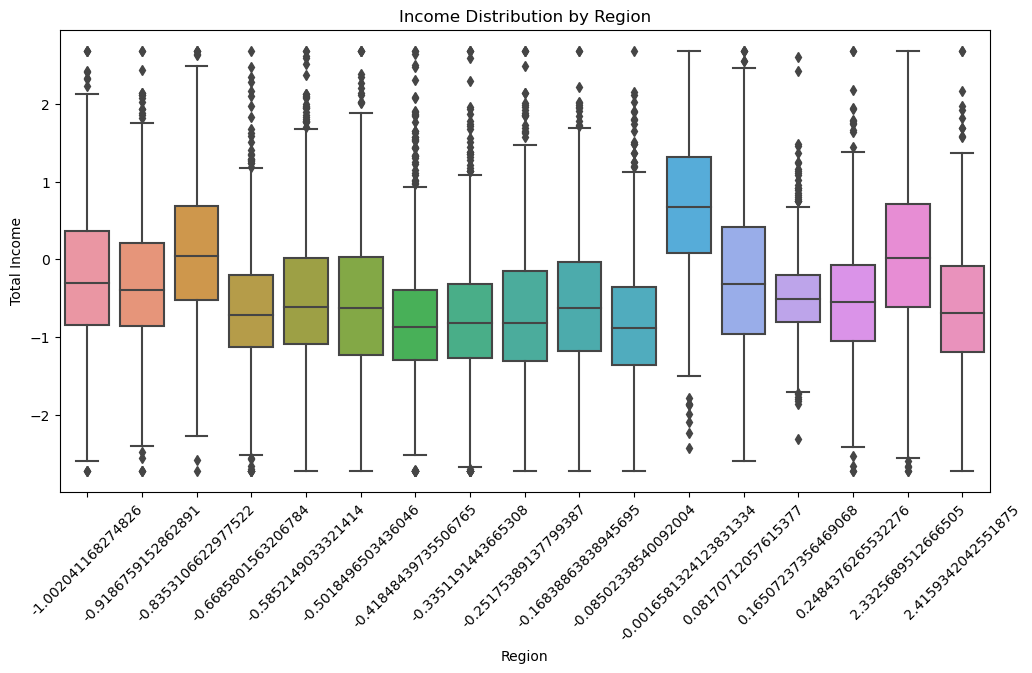

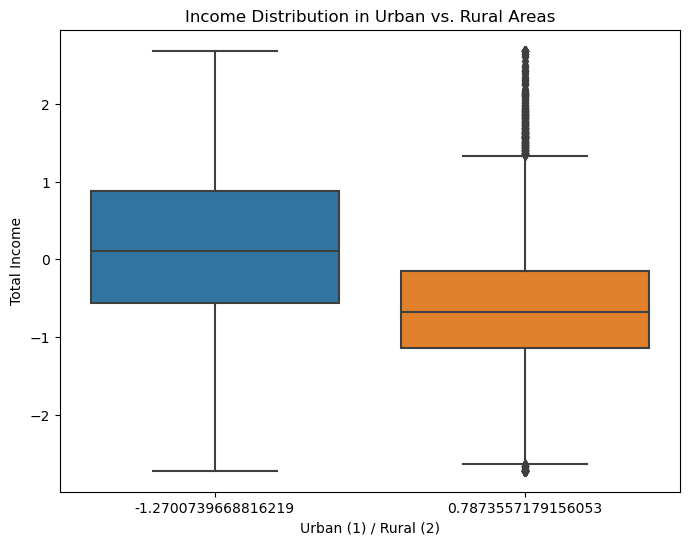

In [100]:
#Total Income Distribution
plt.figure(figsize=(10,6))
sns.histplot(incexp_df["TOINC"], bins=50, kde=True)
plt.title("Distribution of Total Income")
plt.xlabel("Total Income")
plt.ylabel("Frequency")
plt.show()

#Income across regions
plt.figure(figsize=(12,6))
sns.boxplot(x="W_REGN", y="TOINC", data=incexp_df)
plt.title("Income Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Total Income")
plt.xticks(rotation=45)
plt.show()

# Income distribution in Urban vs Rural areas
plt.figure(figsize=(8,6))
sns.boxplot(x="URB", y="TOINC", data=incexp_df)
plt.title("Income Distribution in Urban vs. Rural Areas")
plt.xlabel("Urban (1) / Rural (2)")
plt.ylabel("Total Income")
plt.show()


From the Total Income Distribution, we can see that there is an outlier after the normal distribution curve. The value of 500,000 for the Total Income has the most highest frequency, reaching at 3,000.

## Investigating Correlation between Features
In this section, we will investigate which features have a high correlation with each other. This is to determine which features should be used or removed depending on the data analysis we want to apply.

Here we test the correlation of the features `WAGES`, `AGRI_SAL`, `CASH_ABROAD`.

In [101]:
correlation_test = incexp_df[['WAGES','AGRI_SAL', 'CASH_ABROAD']]
correlation_test.corr()

,WAGES,AGRI_SAL,CASH_ABROAD
WAGES,1.000000,0.320024,-0.023256
AGRI_SAL,0.320024,1.000000,-0.190282
CASH_ABROAD,-0.023256,-0.190282,1.000000


Here, we can see that the correlation value between `WAGES` and `AGRI_SAL` is 0.010084, which is very close to 0, which means there's no significant correlation between these two features.

Same goes for `CASH_ABROAD` and `AGRI_SAL`, which results to a negative value closer to 0.

In [102]:
print(incexp_df['HHTYPE'])

0       -0.666176
1       -0.666176
2       -0.666176
3       -0.666176
4       -0.666176
5        1.459566
6       -0.666176
7        1.459566
8        1.459566
9       -0.666176
10      -0.666176
11       1.459566
12      -0.666176
13      -0.666176
14       1.459566
15      -0.666176
16       1.459566
17      -0.666176
18      -0.666176
19      -0.666176
20      -0.666176
21      -0.666176
22      -0.666176
23      -0.666176
24      -0.666176
25      -0.666176
26       1.459566
27      -0.666176
28      -0.666176
29      -0.666176
30      -0.666176
31      -0.666176
32      -0.666176
33      -0.666176
34      -0.666176
35      -0.666176
36      -0.666176
37      -0.666176
38      -0.666176
39      -0.666176
40       1.459566
41      -0.666176
42      -0.666176
43      -0.666176
44      -0.666176
45      -0.666176
46       1.459566
47      -0.666176
48      -0.666176
49      -0.666176
50      -0.666176
51      -0.666176
52       1.459566
53       1.459566
54      -0.666176
55      -0

In [103]:
correlation_test = incexp_df[['EAINC','TOINC', 'CASH_DOMESTIC', 'CASH_ABROAD', 'PCINC']]
correlation_test.corr()

,EAINC,TOINC,CASH_DOMESTIC,CASH_ABROAD,PCINC
EAINC,1.000000,-0.008118,-0.010971,-0.080238,-0.131301
TOINC,-0.008118,1.000000,-0.195317,0.370894,0.748728
CASH_DOMESTIC,-0.010971,-0.195317,1.000000,-0.096768,-0.254031
CASH_ABROAD,-0.080238,0.370894,-0.096768,1.000000,0.363711
PCINC,-0.131301,0.748728,-0.254031,0.363711,1.000000


In [104]:
correlation_test = incexp_df[['WAGES','PCINC']]
correlation_test.corr()

,WAGES,PCINC
WAGES,1.000000,0.139017
PCINC,0.139017,1.000000


In [105]:
correlation_test = incexp_df[['T_RENTVAL','T_ACTRENT', 'T_IMPUTED_RENT', 'T_BIMPUTED_RENT']]
correlation_test.corr()

,T_RENTVAL,T_ACTRENT,T_IMPUTED_RENT,T_BIMPUTED_RENT
T_RENTVAL,1.00000,NaN,0.90586,NaN
T_ACTRENT,NaN,NaN,NaN,NaN
T_IMPUTED_RENT,0.90586,NaN,1.00000,NaN
T_BIMPUTED_RENT,NaN,NaN,NaN,NaN


## Feature Importance


In [106]:
pd.set_option('display.max_rows', None)  
print(incexp_df.dtypes)

W_REGN                  float64
W_OID                   float64
W_SHSN                  float64
W_HCN                   float64
URB                     float64
RSTR                    float64
PSU                     float64
BWEIGHT                 float64
RFACT                   float64
FSIZE                   float64
AGRI_SAL                float64
NONAGRI_SAL             float64
WAGES                   float64
NETSHARE                float64
CASH_ABROAD             float64
CASH_DOMESTIC           float64
RENTALS_REC             float64
INTEREST                float64
PENSION                 float64
DIVIDENDS               float64
OTHER_SOURCE            float64
NET_RECEIPT             float64
REGFT                   float64
NET_CFG                 float64
NET_LPR                 float64
NET_FISH                float64
NET_FOR                 float64
NET_RET                 float64
NET_MFG                 float64
NET_COM                 float64
NET_TRANS               float64
NET_MIN 

In [107]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

X = incexp_df.drop(columns=['ELECTRIC'])  
y = incexp_df['ELECTRIC']

rf = RandomForestClassifier()
selector = RFE(rf, n_features_to_select=20, step=10)  # step=10 removes 10 features per iteration
selector.fit(X, y)

selected_features = X.columns[selector.support_]
print("Selected features:", selected_features)


Selected features: Index(['W_OID', 'RFACT', 'NET_RECEIPT', 'TOINC', 'T_MEAT', 'T_HOUSING_WATER',
       'T_RENTVAL', 'T_COMMUNICATION', 'T_MISCELLANEOUS', 'T_NFOOD', 'T_TOTEX',
       'T_TOTDIS', 'T_TOREC', 'TOILET', 'WATER', 'DISTANCE', 'TV_QTY',
       'CD_QTY', 'REF_QTY', 'PCINC'],
      dtype='object')


Selected features: Index(['W_OID', 'RFACT', 'NET_RECEIPT', 'REGFT', 'T_MEAT', 'T_MILK', 'T_VEG',
       'T_SUGAR', 'T_HOUSING_WATER', 'T_RENTVAL', 'T_COMMUNICATION', 'T_NFOOD',
       'T_TOTEX', 'TOILET', 'WATER', 'DISTANCE', 'TV_QTY', 'CD_QTY',
       'CELLPHONE_QTY', 'PCINC'],
      dtype='object')

# Improving Model Performance

## Logistic Regression for Predicting if Household has Electricity

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define features and target variable
X = incexp_df[selected_features]  # Using the selected features from RFE
y = incexp_df['ELECTRIC']

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


LogisticRegression()

In [110]:
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.8983
Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.85      0.89      1068
           2       0.86      0.94      0.90      1046

    accuracy                           0.90      2114
   macro avg       0.90      0.90      0.90      2114
weighted avg       0.90      0.90      0.90      2114



In [111]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="most_frequent")  # Always predicts the majority class
dummy.fit(X_train, y_train)
dummy_acc = dummy.score(X_test, y_test)
print(f"Baseline Dummy Accuracy: {dummy_acc:.4f}")

Baseline Dummy Accuracy: 0.4948


## Naive Bayes for Predicting if Household has Electricity

In [112]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()

In [113]:
naive_bayes.fit(X_train, y_train)

predictions = naive_bayes.predict(X_train)
predictions

array([1, 2, 2, ..., 1, 2, 2], dtype=int64)

In [114]:
def compute_accuracy(predictions, actual):
    num_correct = (predictions == actual).sum()
    accuracy = num_correct / predictions.shape[0] * 100
    return accuracy

print("Training accuracy: ", compute_accuracy(predictions, y_train), "%")

Training accuracy:  88.68259224219489 %


In [115]:
predictions = naive_bayes.predict(X_test)
predictions

print("Test accuracy: ", compute_accuracy(predictions, y_test), "%")

Test accuracy:  86.9441816461684 %


In [116]:
print(naive_bayes.class_count_)
print(naive_bayes.class_prior_)

[4217. 4239.]
[0.49869915 0.50130085]


# Neural Networks to predict whether or not a household has electricity

In [117]:
from neural_network import NeuralNetwork
from data_loader import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from IPython.display import display


Hyperparameters: number of hidden layer and activation layers

In [118]:
hidden_layer_options = [
    [32, 16], 
    [64, 32], 
    [128, 64, 32]
]
activation_options = ['relu', 'leaky_relu']

Convert train and test data into tensor

In [119]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor((y_train.values - 1), dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor((y_test.values - 1), dtype=torch.float32).view(-1, 1)

Initialize the model with leaky ReLu activation layers, max epoch = 50

In [120]:
results = []  # holds results for later 
loss_curves = {}  # holds curves for visualization

#for each hyperparameter
for list_hidden in hidden_layer_options:
    for activation in activation_options:
        print(f"Training with hidden layers: {list_hidden}, activation: {activation}")

        # Model and optimizer initialization
        model = NeuralNetwork(input_size=len(selected_features), list_hidden=list_hidden, activation=activation, num_classes=1)
        model.create_network()
        criterion = nn.BCELoss()                         #binary cross entropy loss
        adam = optim.Adam(model.parameters(), lr=0.001)  #adam optimizer 

        data_loader = DataLoader(X_train_tensor, y_train_tensor, batch_size=32)

        # Training loop, adapted from notebook 5 
        e = 0
        max_epochs = 50
        is_converged = False
        previous_loss = 0
        losses = []  # track losses for visualization

        while e < max_epochs and not is_converged:
            current_epoch_loss = 0
            X_batch, y_batch = data_loader.get_batch()

            for X, y in zip(X_batch, y_batch):
                X = torch.Tensor(X)
                y = torch.Tensor(y).to(torch.float32)

                adam.zero_grad()
                _, probabilities = model(X)
                loss = criterion(probabilities, y)
                loss.backward()
                adam.step()
                current_epoch_loss += loss.item()

            average_loss = current_epoch_loss / len(X_batch)
            losses.append(average_loss)

            if (e + 1) % 10 == 0:
                print(f'Epoch {e + 1}, Loss: {average_loss:.6f}')

            if abs(previous_loss - loss.item()) < 0.00000005:
                is_converged = True
            else:
                previous_loss = loss.item()
                e += 1

        # save loss curve for visualization
        config_name = f"Hidden: {list_hidden}, Activation: {activation}"
        loss_curves[config_name] = losses

        # evaluate model
        model.eval()
        with torch.no_grad():
            _, outputs_test = model(X_test_tensor)
            test_loss = criterion(outputs_test, y_test_tensor)
            predictions = (outputs_test >= 0.5).float()
            accuracy = (predictions == y_test_tensor).sum().item() / len(y_test_tensor)

            f1 = f1_score(y_test_tensor.cpu().numpy(), predictions.cpu().numpy())
            precision = precision_score(y_test_tensor.cpu().numpy(), predictions.cpu().numpy())
            recall = recall_score(y_test_tensor.cpu().numpy(), predictions.cpu().numpy())
            auc = roc_auc_score(y_test_tensor.cpu().numpy(), outputs_test.cpu().numpy())

        #store results
        results.append({
            'config': config_name,
            'test_loss': test_loss.item(),
            'accuracy': accuracy,
            'f1_score': f1,
            'precision': precision,
            'recall': recall,
            'roc_auc': auc
        })


Training with hidden layers: [32, 16], activation: relu
Epoch 10, Loss: 0.261433
Epoch 20, Loss: 0.258040
Epoch 30, Loss: 0.254998
Epoch 40, Loss: 0.253667
Epoch 50, Loss: 0.253697
Training with hidden layers: [32, 16], activation: leaky_relu
Epoch 10, Loss: 0.261433
Epoch 20, Loss: 0.257517
Epoch 30, Loss: 0.254481
Epoch 40, Loss: 0.253367
Epoch 50, Loss: 0.253555
Training with hidden layers: [64, 32], activation: relu
Epoch 10, Loss: 0.260837
Epoch 20, Loss: 0.258040
Epoch 30, Loss: 0.254279
Epoch 40, Loss: 0.253169
Epoch 50, Loss: 0.252702
Training with hidden layers: [64, 32], activation: leaky_relu
Epoch 10, Loss: 0.260550
Epoch 20, Loss: 0.257969
Epoch 30, Loss: 0.254342
Epoch 40, Loss: 0.253396
Epoch 50, Loss: 0.253198
Training with hidden layers: [128, 64, 32], activation: relu
Epoch 10, Loss: 0.261272
Epoch 20, Loss: 0.257145
Epoch 30, Loss: 0.253717
Epoch 40, Loss: 0.253186
Epoch 50, Loss: 0.251575
Training with hidden layers: [128, 64, 32], activation: leaky_relu
Epoch 10, L

Visualizing loss curves per model

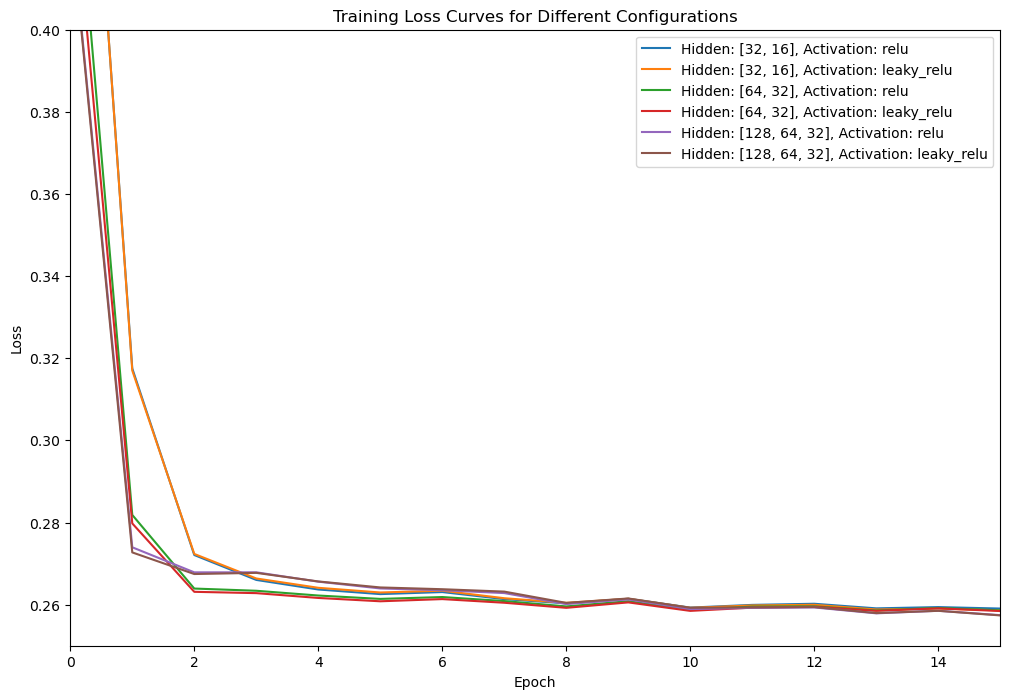

In [121]:
plt.figure(figsize=(12, 8))
for config, losses in loss_curves.items():
    plt.plot(losses, label=config)

plt.xlim(0, 15)
plt.ylim(0.25, 0.40) 

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curves for Different Configurations')
plt.legend()
plt.show()

Results summary

In [122]:
df_results = pd.DataFrame(results)
print("\nModel Evaluation Summary:")
display(df_results[['config', 'test_loss', 'accuracy', 'f1_score', 'precision', 'recall', 'roc_auc']])


Model Evaluation Summary:


,config,test_loss,accuracy,f1_score,precision,recall,roc_auc
0,"Hidden: [32, 16], Activation: relu",0.280091,0.903027,0.905137,0.877130,0.934990,0.947622
1,"Hidden: [32, 16], Activation: leaky_relu",0.280222,0.901608,0.903614,0.876799,0.932122,0.947493
2,"Hidden: [64, 32], Activation: relu",0.283599,0.899716,0.901487,0.877034,0.927342,0.947407
3,"Hidden: [64, 32], Activation: leaky_relu",0.282965,0.901608,0.903256,0.879529,0.928298,0.947438
4,"Hidden: [128, 64, 32], Activation: relu",0.284620,0.903500,0.905643,0.877240,0.935946,0.947907
5,"Hidden: [128, 64, 32], Activation: leaky_relu",0.286283,0.901135,0.902926,0.878049,0.929254,0.947566


Max epochs = 100

In [123]:
results_100 = []  # holds results for later 
loss_curves_100 = {}  # holds curves for visualization

#for each hyperparameter
for list_hidden in hidden_layer_options:
    for activation in activation_options:
        print(f"Training with hidden layers: {list_hidden}, activation: {activation}")

        # Model and optimizer initialization
        model = NeuralNetwork(input_size=len(selected_features), list_hidden=list_hidden, activation=activation, num_classes=1)
        model.create_network()
        criterion = nn.BCELoss()                         #binary cross entropy loss
        adam = optim.Adam(model.parameters(), lr=0.001)  #adam optimizer 

        data_loader = DataLoader(X_train_tensor, y_train_tensor, batch_size=32)

        # Training loop, adapted from notebook 5 
        e = 0
        max_epochs = 100
        is_converged = False
        previous_loss = 0
        losses = []  # track losses for visualization

        while e < max_epochs and not is_converged:
            current_epoch_loss = 0
            X_batch, y_batch = data_loader.get_batch()

            for X, y in zip(X_batch, y_batch):
                X = torch.Tensor(X)
                y = torch.Tensor(y).to(torch.float32)

                adam.zero_grad()
                _, probabilities = model(X)
                loss = criterion(probabilities, y)
                loss.backward()
                adam.step()
                current_epoch_loss += loss.item()

            average_loss = current_epoch_loss / len(X_batch)
            losses.append(average_loss)

            if (e + 1) % 10 == 0:
                print(f'Epoch {e + 1}, Loss: {average_loss:.6f}')

            if abs(previous_loss - loss.item()) < 0.00000005:
                is_converged = True
            else:
                previous_loss = loss.item()
                e += 1

        # save loss curve for visualization
        config_name = f"Hidden: {list_hidden}, Activation: {activation}"
        loss_curves_100[config_name] = losses

        # evaluate model
        model.eval()
        with torch.no_grad():
            _, outputs_test = model(X_test_tensor)
            test_loss = criterion(outputs_test, y_test_tensor)
            predictions = (outputs_test >= 0.5).float()
            accuracy = (predictions == y_test_tensor).sum().item() / len(y_test_tensor)

            f1 = f1_score(y_test_tensor.cpu().numpy(), predictions.cpu().numpy())
            precision = precision_score(y_test_tensor.cpu().numpy(), predictions.cpu().numpy())
            recall = recall_score(y_test_tensor.cpu().numpy(), predictions.cpu().numpy())
            auc = roc_auc_score(y_test_tensor.cpu().numpy(), outputs_test.cpu().numpy())

        #store results
        results_100.append({
            'config': config_name,
            'test_loss': test_loss.item(),
            'accuracy': accuracy,
            'f1_score': f1,
            'precision': precision,
            'recall': recall,
            'roc_auc': auc
        })


Training with hidden layers: [32, 16], activation: relu
Epoch 10, Loss: 0.261836
Epoch 20, Loss: 0.258417
Epoch 30, Loss: 0.255227
Epoch 40, Loss: 0.253848
Epoch 50, Loss: 0.253840
Epoch 60, Loss: 0.253000
Epoch 70, Loss: 0.251796
Epoch 80, Loss: 0.249788
Epoch 90, Loss: 0.248934
Epoch 100, Loss: 0.248016
Training with hidden layers: [32, 16], activation: leaky_relu
Epoch 10, Loss: 0.262238
Epoch 20, Loss: 0.258768
Epoch 30, Loss: 0.255399
Epoch 40, Loss: 0.253758
Epoch 50, Loss: 0.253535
Epoch 60, Loss: 0.252559
Epoch 70, Loss: 0.251358
Epoch 80, Loss: 0.249358
Epoch 90, Loss: 0.248663
Epoch 100, Loss: 0.247834
Training with hidden layers: [64, 32], activation: relu
Epoch 10, Loss: 0.260477
Epoch 20, Loss: 0.257832
Epoch 30, Loss: 0.254192
Epoch 40, Loss: 0.253203
Epoch 50, Loss: 0.252886
Epoch 60, Loss: 0.252208
Epoch 70, Loss: 0.250879
Epoch 80, Loss: 0.248376
Epoch 90, Loss: 0.247192
Epoch 100, Loss: 0.245655
Training with hidden layers: [64, 32], activation: leaky_relu
Epoch 10, L

Visualizing loss curves per model

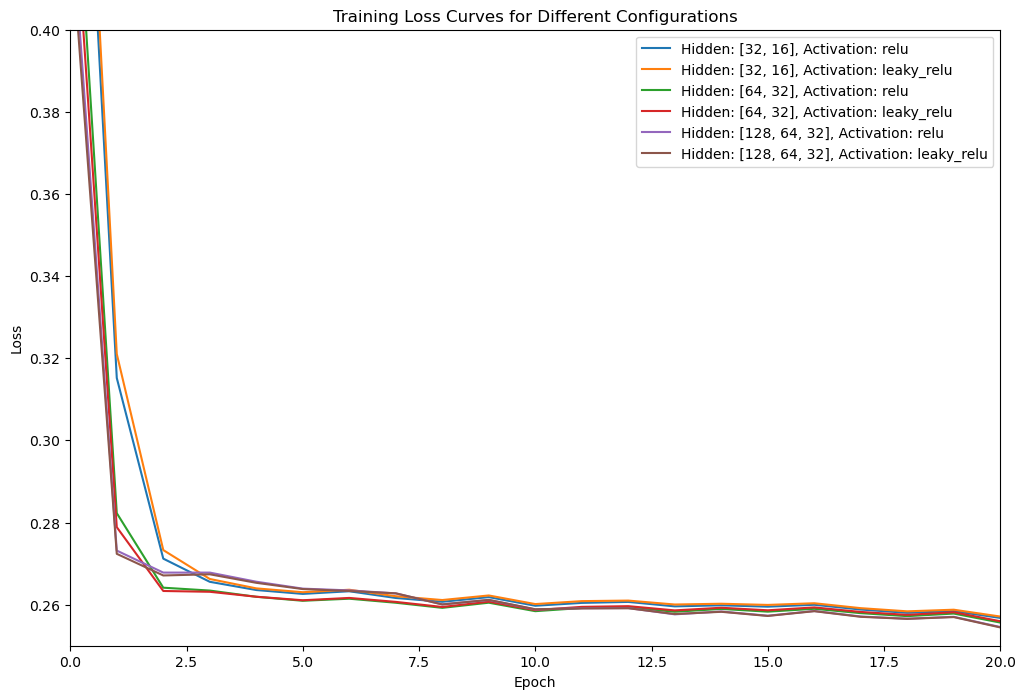

In [124]:
plt.figure(figsize=(12, 8))
for config, losses in loss_curves_100.items():
    plt.plot(losses, label=config)

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.xlim(0, 20)  
plt.ylim(0.25, 0.40)  

plt.title('Training Loss Curves for Different Configurations')
plt.legend()
plt.show()

Results summary

In [125]:
df_results = pd.DataFrame(results_100)
print("\nModel Evaluation Summary:")
display(df_results[['config', 'test_loss', 'accuracy', 'f1_score', 'precision', 'recall', 'roc_auc']])


Model Evaluation Summary:


,config,test_loss,accuracy,f1_score,precision,recall,roc_auc
0,"Hidden: [32, 16], Activation: relu",0.278673,0.902081,0.905263,0.868306,0.945507,0.947862
1,"Hidden: [32, 16], Activation: leaky_relu",0.279288,0.901135,0.904435,0.866784,0.945507,0.947615
2,"Hidden: [64, 32], Activation: relu",0.277123,0.902554,0.905678,0.869069,0.945507,0.948171
3,"Hidden: [64, 32], Activation: leaky_relu",0.278202,0.902081,0.905263,0.868306,0.945507,0.947925
4,"Hidden: [128, 64, 32], Activation: relu",0.275824,0.900662,0.903846,0.867311,0.943595,0.948458
5,"Hidden: [128, 64, 32], Activation: leaky_relu",0.277546,0.902081,0.905263,0.868306,0.945507,0.948475


# Error Analysis

# Model Performance Summary

# Insights and Conclusions

# References

AI Tools were utilized for this work, namely ChatGPT and Deepseek.